# GIF GENERATION


In [5]:
# example of interpolating between generated faces
import numpy as np
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from numpy import linspace
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from PIL import Image
import PIL
from matplotlib.pyplot import imsave
from matplotlib.pyplot import cm
import io
import imageio

# generate points in latent space as input for the generator


def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

# uniform interpolation between two points in latent space


def interpolate_points(p1, p2, n_steps):
    # interpolate ratios between the points
    ratios = linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return asarray(vectors)

# create a plot of generated images
size = 128

def plot_generated(examples, n):
    # plot images
    for i in range(n):
        # define subplot
        pyplot.subplot(1, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        img= np.zeros((size,size))
        for j in range(size):
            for k in range(size):
                img[j,k] = examples[i,j,k,0]

        pyplot.imshow(img, 'gray')
        imsave("images_gif/image_%d.png" % i, img)
        Image.open("images_gif/image_%d.png" % i).convert('L').save("images_gif/imageg_%d.png" % i)


# load model
model = load_model('generator.h5')
# generate points in latent space
pts = generate_latent_points(100, 100)
print(pts.shape)
# interpolate points in latent space
interpolated = interpolate_points(pts[0], pts[42],100)
# generate images
X = model.predict(interpolated)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
plot_generated(X, len(interpolated))


(100, 100)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


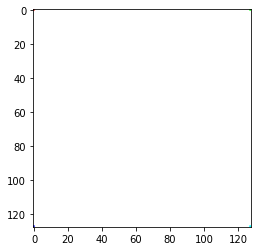

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 100)


C:\Users\valen\.conda\envs\gan\lib\site-packages\ipykernel_launcher.py:156: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


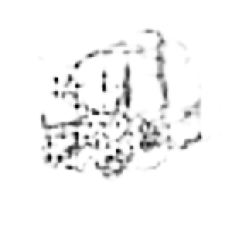

In [8]:
import matplotlib.pyplot as plt
import numpy as np


class RBFInterpolation:
    def __init__(self,pointList,pointValues):
        self.pointListSize = 4
        self.pointList = pointList
        #w coefficients
        self.w = np.zeros(self.pointListSize)
        #distance matrix
        self.rbf = np.zeros((self.pointListSize,self.pointListSize))
        #compute the distance matrix
        for i in range(self.pointListSize):
            for j in range(self.pointListSize):
                self.rbf[i][j] = rbfDistance(pointList[i],pointList[j])
        
        # compute the w coefficients (solve linear system Ax=b)
        for i in range(self.pointListSize):
            self.w = np.linalg.solve(self.rbf,pointValues)

    
    def  interpolation(self,point):
        value = 0
        for i in range(self.pointListSize):
            value += self.w[i] * rbfDistance(point,self.pointList[i]);  
        return value

def rbfDistance(pt1,pt2):
    def getNorm(vec):
        d = np.sqrt(vec[0]**2 + vec[1]**2)
        return d
    d = getNorm(pt1-pt2)
    return np.exp(-0.00002*d*d)

            #### MAIN ####
            
image_size = 128
image = np.zeros((image_size,image_size,3))
image[:,:,:].fill(255)


nb_points = 4

pointListPos = np.zeros((nb_points,2))
pointListRed = np.zeros(nb_points)
pointListGreen = np.zeros(nb_points)
pointListBlue = np.zeros(nb_points)

pt = np.zeros(2)
    
compteur = 0

pt[0] = 0
pt[1] = 0
pointListPos[compteur] = pt; 
pointListRed[compteur] = 255
pointListGreen[compteur] = 0
pointListBlue[compteur] = 0

image[int(pt[0]),int(pt[1]),0] = pointListRed[compteur]
image[int(pt[0]),int(pt[1]),1] = pointListGreen[compteur]
image[int(pt[0]),int(pt[1]),2] = pointListBlue[compteur]

compteur+=1

pt[0] = 0
pt[1] = image_size-1
pointListPos[compteur] = pt; 
pointListRed[compteur] = 0
pointListGreen[compteur] = 255
pointListBlue[compteur] = 0

image[int(pt[0]),int(pt[1]),0] = pointListRed[compteur]
image[int(pt[0]),int(pt[1]),1] = pointListGreen[compteur]
image[int(pt[0]),int(pt[1]),2] = pointListBlue[compteur]

compteur+=1

pt[0] = image_size-1
pt[1] = 0
pointListPos[compteur] = pt; 
pointListRed[compteur] = 0
pointListGreen[compteur] = 0
pointListBlue[compteur] = 255

image[int(pt[0]),int(pt[1]),0] = pointListRed[compteur]
image[int(pt[0]),int(pt[1]),1] = pointListGreen[compteur]
image[int(pt[0]),int(pt[1]),2] = pointListBlue[compteur]

compteur+=1

pt[0] = image_size-1
pt[1] = image_size-1
pointListPos[compteur] = pt; 
pointListRed[compteur] = 0
pointListGreen[compteur] = 255
pointListBlue[compteur] = 255

image[int(pt[0]),int(pt[1]),0] = pointListRed[compteur]
image[int(pt[0]),int(pt[1]),1] = pointListGreen[compteur]
image[int(pt[0]),int(pt[1]),2] = pointListBlue[compteur]

plt.imshow(image)
plt.show()
#plt.imsave("output/RBF_point_python.ppm", image/255)

rbf_r = RBFInterpolation(pointListPos,pointListRed)  
rbf_g = RBFInterpolation(pointListPos,pointListGreen)    
rbf_b = RBFInterpolation(pointListPos,pointListBlue)

for i in range(image_size):
    for j in range(image_size):
        pt[0] = i
        pt[1] = j
        image[i,j,0] = min(max(rbf_r.interpolation(pt),0.0),255.0)
        image[i,j,1] = min(max(rbf_g.interpolation(pt),0.0),255.0)
        image[i,j,2] = min(max(rbf_b.interpolation(pt),0.0),255.0)
plt.figure()        
plt.imshow(image)
plt.imsave("output/RBF_interpolation_python.png", image/255)


# example of interpolating between generated faces
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from numpy import linspace
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from PIL import Image
import PIL
from matplotlib.pyplot import imsave
from matplotlib.pyplot import cm
import io
import imageio

# generate points in latent space as input for the generator


def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

# uniform interpolation between two points in latent space

# create a plot of generated images

def plot_generated(examples, n):
    # plot images
    for i in range(n):
        # define subplot
        pyplot.subplot(1, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        img= np.zeros((image_size,image_size))
        for j in range(image_size):
            for k in range(image_size):
                img[j,k] = examples[i,j,k,0]

        pyplot.imshow(img, 'gray')
        imsave("image.png", img)
        #Image.open("images_gif/image_%d.png" % i).convert('L').save("images_gif/imageg_%d.png" % i)


# load model
model = load_model('generator.h5')
# generate points in latent space
pts = generate_latent_points(100, 1)
print(pts.shape)


# generate images
X = model.predict(pts)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
plot_generated(X, len(pts))